# FASE 2: VISUALIZACIÓN

In [127]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv('files/datos_totales_clean.csv')

In [129]:
df.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
90805,842835,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,48521.0,Divorced,Aurora,19160.99,Standard,2016,4,2016,12,2018,2,0,0,0,0,0.0,0,0,no,bajo
16062,990933,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Doctor,244110.0,Married,Star,4893.98,Standard,2013,12,0,0,2017,7,14,0,14,5166,516.0,0,0,si,medio-alto
323837,653698,Canada,Ontario,Toronto,M2P 4F6,Female,Bachelor,52379.0,Single,Star,5239.89,Standard,2015,8,0,0,2017,6,16,0,16,2160,216.0,0,0,si,bajo
59338,285767,Canada,Ontario,Toronto,M1R 4K3,Female,College,NaN,Married,Aurora,8197.20,Standard,2016,11,2017,7,2017,11,0,0,0,0,0.0,0,0,no,NaN
24807,901231,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Single,Aurora,5272.32,Standard,2016,10,0,0,2018,4,5,0,5,2980,447.0,0,0,si,NaN


### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
# total_flights vs year & month
# cogemos la de total_flights porque recordemos que esta col es la suma vuelos reservados + vuelos con acompañantes
#recordemos tb que las reservas son sólo de 2017 y 2018
df['year'].unique()

array([2017, 2018])

In [176]:
df_2017 = df[(df['year'] == 2017) & (df['total_flights'] != 0)]

In [177]:
df_2017_vuelos_por_mes = df_2017.groupby('month')['total_flights'].sum().reset_index() #sumamos los vuelos, no contamos las filas

In [178]:
df_2018 = df[(df['year'] == 2018) & (df['total_flights'] != 0)]

In [179]:
df_2018_vuelos_por_mes = df_2018.groupby('month')['total_flights'].sum().reset_index()

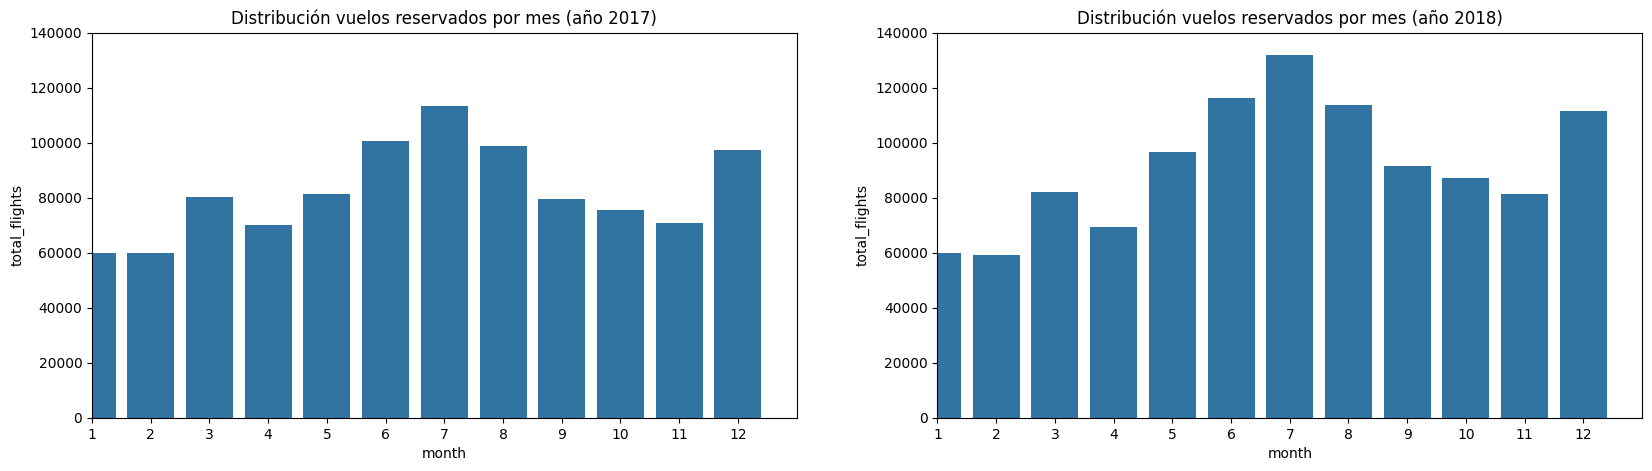

In [183]:
# Como solo hay dos años, vamos a hacer un subplot con dos gráficas, una para cada año:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

#Utilizamos Barplot porque tenemos una variable numérica(vuelos reservados) y variable categórica(mes)

#Gráfico 1:
sns.barplot(x = 'month', y = 'total_flights', data = df_2017_vuelos_por_mes, ax = axes[0])
axes[0].set_title("Distribución vuelos reservados por mes (año 2017)")

#Gráfico 2:
sns.barplot(x = 'month', y = 'total_flights', data = df_2018_vuelos_por_mes, ax = axes[1])
axes[1].set_title("Distribución vuelos reservados por mes (año 2018)")

#ponemos la misma escala en los ejes:

#eje x, para asegurarnos que coge bien el mes núm 12:
axes[0].set_xlim(0,12) 
axes[1].set_xlim(0,12)

#eje y, hasta 140.000:
axes[0].set_ylim(0,140000) 
axes[1].set_ylim(0,140000);

`Conclusiones 2017 vs 2018`:
- Aunque la tendencia parece similar, durante el año 2017 se reservaron menos vuelos que en 2018. 
- Los meses con más reservas: `época de verano (junio, julio, agosto) y el mes de diciembre`. El primer trimestre tiene menos reservas.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [136]:
df.sample(1) #distance vs points_accumulated

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
55333,787001,Canada,Quebec,Montreal,H4G 3T4,Female,College,NaN,Married,Aurora,7890.6,Standard,2016,1,0,0,2018,2,3,0,3,1197,178.5,0,0,si,NaN


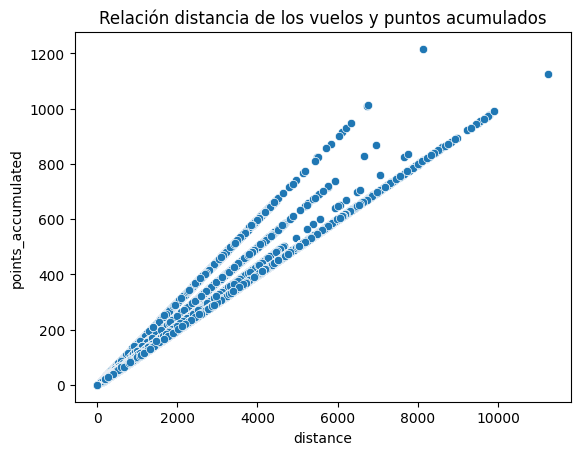

In [137]:
sns.scatterplot(data=df, x="distance", y="points_accumulated")
plt.title("Relación distancia de los vuelos y puntos acumulados");

`Conclusiones:` Hay una clara relación directa entre ambas variables. `A mayor distancia recorrida en los vuelos, más puntos se acumulan`.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [138]:
df.sample(1) #province, count clientes

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
179786,372737,Canada,Ontario,Toronto,M2P 4F6,Male,High School or Below,79830.0,Married,Aurora,5498.94,2018 Promotion,2018,4,0,0,2017,3,0,0,0,0,0.0,0,0,si,bajo


In [139]:
df_provincia = df[['loyalty_number', 'province']]
df_provincia.shape

(401688, 2)

In [140]:
df_provincia.duplicated().sum() #este df tiene duplicados, vamos a eliminarlos

np.int64(384951)

In [141]:
#se nos queda un df con 16.737 (mismas filas que el csv inicial de clientes!)
df_provincia = df_provincia.drop_duplicates() 

In [142]:
df_analisis_provincia = df_provincia.groupby('province')['loyalty_number'].count().reset_index()

In [143]:
df_analisis_provincia.head(1)

,province,loyalty_number
0,Alberta,969


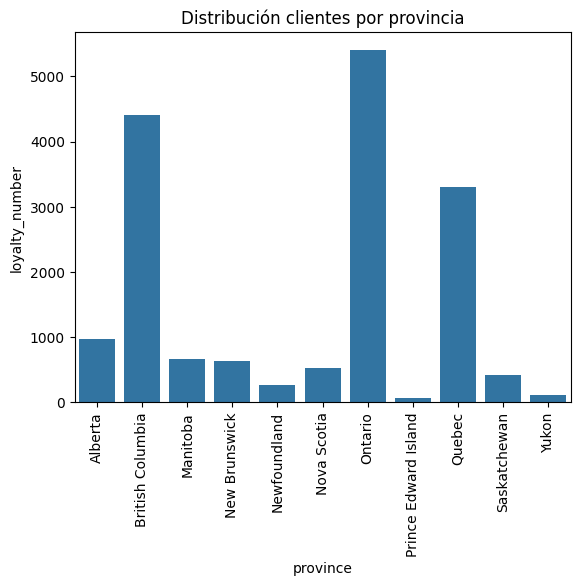

In [144]:
#barplot porque tenemos una variable numérica y variable categórica
sns.barplot(x = 'province', y = 'loyalty_number', data = df_analisis_provincia)
plt.title("Distribución clientes por provincia")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90);

`Conclusiones`:
- Podium de estados con más clientes: (1) `Ontario` es el estado que más clientes tiene, (2) `British Columbia`, (3) `Quebec`.
- Estados con menos clientes: (1) `Prince Edward Island`, seguido de cerca de (2) `Yulkon`.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [145]:
df.head(1) #salary quitar nulos, education

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0,2017,1,0,0,0,0,0.0,0,0,si,bajo


Como ya vimos en el EDA, la columna `salary` tenía mucha correlación con `education` (usamos `df.corr()`). No obstante, no se acercaba lo suficiente al 1 como para imputar los nulos. Por eso dejamos los nulos sin cambiar. Para hacer esta visualización, tendremos primero que quitar los nulos del dataframe.

In [146]:
#cogemos sólo las columnas de info de los clientes
df_clientes_salario = df[['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month']]

In [147]:
df_clientes_salario.shape

(401688, 16)

In [148]:
# nos quedamos sólo con los NO nulos en salario
df_clientes_salario = df_clientes_salario[df_clientes_salario['salary'].notnull()]

In [149]:
df_clientes_salario.duplicated().sum() #hay 299.976

np.int64(287477)

In [150]:
df_clientes_salario = df_clientes_salario.drop_duplicates()

In [151]:
df_clientes_salario.shape #12.499. 
#Esto es porque los 16.737 originales que aparecían en clientes, los que faltan tenían salario NaN
#aunque en realidad, si están repetidos da igual, porque sacamos una media y obtendremos el mismo resultado

(12499, 16)

In [152]:
df_salario_educacion = df_clientes_salario.groupby(['education'])['salary'].mean().round(2).reset_index()

In [153]:
df_salario_educacion.head()

,education,salary
0,Bachelor,72577.25
1,Doctor,178608.90
2,High School or Below,61199.16
3,Master,103757.85


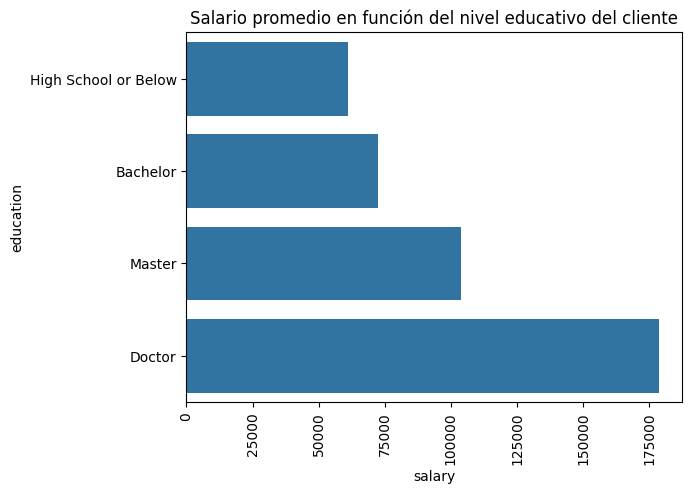

In [154]:
#Barplot, porque queremos comparar dos variables, una categórica y otra numérica:
#barplot porque tenemos una variable numérica y variable categórica
sns.barplot(x = 'salary', 
            y = 'education', 
            data = df_salario_educacion, 
            order=['High School or Below', 'Bachelor', 'Master', 'Doctor']) #ordenamos las etiquetas de MENOR a MAYOR formación

plt.title("Salario promedio en función del nivel educativo del cliente")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90);

`Conclusiones`: Se puede ver claramente que a `mayor nivel de educación, mayor es el salario`.

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [155]:
df.head(1) #loyalty_card vs loyalty_number

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0,2017,1,0,0,0,0,0.0,0,0,si,bajo


In [156]:
#cogemos sólo las columnas de info de los clientes
df_clientes_tarjetas = df[['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month']]

In [157]:
df_clientes_tarjetas.shape

(401688, 16)

In [158]:
df_clientes_tarjetas.duplicated().sum() #hay 384.951

np.int64(384951)

In [159]:
df_clientes_tarjetas = df_clientes_tarjetas.drop_duplicates()

In [160]:
df_clientes_tarjetas.shape #16.737. Los originales, está ok. 


(16737, 16)

In [161]:
df_tarjetas = df_clientes_tarjetas.groupby('loyalty_card')['loyalty_number'].count().reset_index()

In [162]:
df_tarjetas

,loyalty_card,loyalty_number
0,Aurora,3429
1,Nova,5671
2,Star,7637


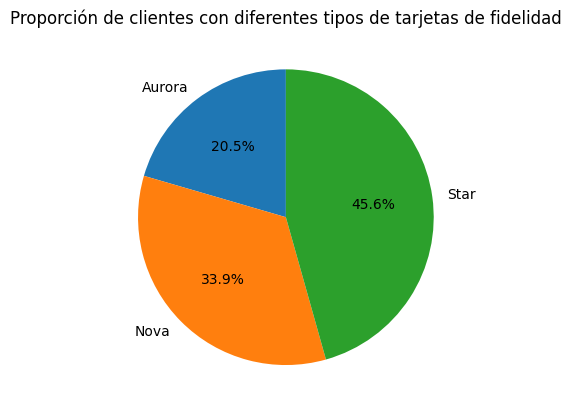

In [163]:
# como nos pide proporción (que implica %) vamos a utilizar un pieplot:
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_tarjetas, 
        autopct=  '%1.1f%%', 
        startangle=90)

plt.title("Proporción de clientes con diferentes tipos de tarjetas de fidelidad");

`Conclusiones`:
- La mayor parte de los clientes tiene una tarjeta `Star`. La menos utilizada es la `Aurora`.

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [164]:
df.head(1) #gender vs marital_status

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0,0,2017,1,0,0,0,0,0.0,0,0,si,bajo


In [165]:
#cogemos sólo las columnas de info de los clientes
df_clientes_genero_marital = df[['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month']]

In [166]:
df_clientes_genero_marital.shape

(401688, 16)

In [167]:
df_clientes_genero_marital.duplicated().sum() #hay 384.951

np.int64(384951)

In [168]:
df_clientes_genero_marital = df_clientes_genero_marital.drop_duplicates()

In [169]:
df_clientes_genero_marital.shape #16.737. Los originales, está ok. 

(16737, 16)

In [170]:
df_genero_marital = df_clientes_genero_marital.groupby(['marital_status', 'gender'])['loyalty_number'].count().reset_index()

In [171]:
df_genero_marital #gender lo pondremos en 'hue' porque es booleano

,marital_status,gender,loyalty_number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


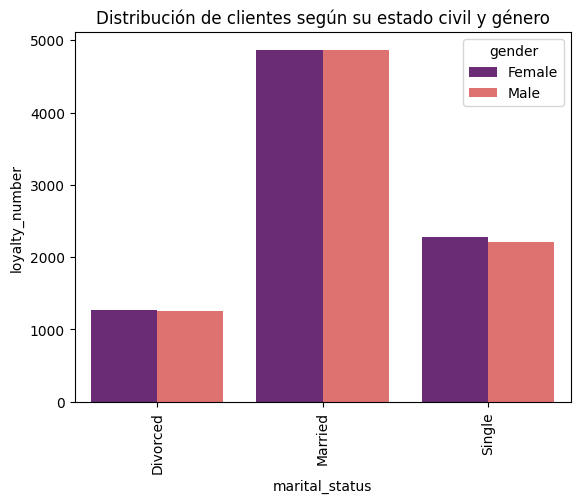

In [172]:
#Tenemos dos variables: marital_status (categorica) y conteo de loyalty_number(num). Podríamos usar un barplot con el hue = gender.

sns.barplot(x = "marital_status", 
            y = "loyalty_number",
            data = df_genero_marital,
            palette = "magma",
            hue = "gender")

plt.title("Distribución de clientes según su estado civil y género")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90);

`Conclusiones`: Está muy parejo. Es bastante curioso que no haya más diferencia. En `married` se podría pensar que el número de hombres y mujeres es bastante similar, porque se apunten en pareja, pero nos pasa esa circunstancia en las tres categorías (`divorciado`, `casado` y `soltero`).

Si partiéramos de la base de que los datos hayan sido recabados correctamente, podríamos decir:

- `La mayoría de los clientes de la empresa son clientes casados`. Los que menos usan la aerolínea son los divorciados.

- También podríamos decir con total seguridad que el `género no afecta nada a la condición de cliente`. Vamos a verlo mejor con el siguiente gráfico:


In [173]:
df_gender = df_clientes_genero_marital.groupby('gender')['loyalty_number'].count().reset_index()

In [174]:
df_gender

,gender,loyalty_number
0,Female,8410
1,Male,8327


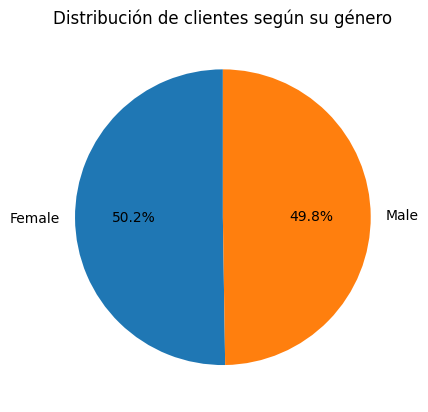

In [175]:
#como sólo tenemos una variable (gender) npodemos usar un pieplot:
plt.pie("loyalty_number", labels= "gender",
        data = df_gender, 
        autopct=  '%1.1f%%', 
        startangle=90)

plt.title("Distribución de clientes según su género");